# Linear Regression

In [114]:
#Ref: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
#Ref: https://www.geeksforgeeks.org/linear-regression-python-implementation/
#Ref: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import mean_squared_error, r2_score

# Problem: We will solve a regression problem, ie, given X we will predict the Y (continuous)

In [115]:
#Problem: We will solve a regression problem, ie, given X we will predict the Y (continuous)

# load the boston dataset 
boston_data = datasets.load_boston(return_X_y=False)
#the return_X_y=False returns a bunch object and next we convert the bunch object to a pandas dataframe
df1 = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df1['target'] = pd.Series(boston_data.target)
df1.head()
#df1.to_csv('boston.csv')
#Data description
#This data has 14 columns and the goal is to predict the median value (price) of a home which is shown as the target column 
#The features are as follows:
#CRIM - per capita crime rate by town
#ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS - proportion of non-retail business acres per town.
#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#NOX - nitric oxides concentration (parts per 10 million)
#RM - average number of rooms per dwelling
#AGE - proportion of owner-occupied units built prior to 1940
#DIS - weighted distances to five Boston employment centres
#RAD - index of accessibility to radial highways
#TAX - full-value property-tax rate per $10,000
#PTRATIO - pupil-teacher ratio by town
#B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT - % lower status of the population
#MEDV - Median value of owner-occupied homes in $1000's

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Variables identification

In [116]:
#Variables identification

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [54]:
df1.shape

(506, 14)

# check individual column count

In [118]:
df1['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [119]:
#check individual column count
#df.count() does not include NaN values
data=df1.copy()
ls=list()
ls1=list()
for i in data.columns:
    if data[i].dtypes in ['float64', 'int64']:
        if data[i].nunique() > 10:
            ls.append(i)
            ls1.append(data[i].nunique())

print(ls, "\n",ls1)

print(df1['CRIM'].count())
df1[ls].describe()

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target'] 
 [504, 26, 76, 81, 446, 356, 412, 66, 46, 357, 455, 229]
506


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


# Check for missing values

In [120]:
#Check for missing values
# Total missing values for each feature
#Pandas isnull() method detect blank and NA as NaN
print (df1.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


# Replace missing values with a number (only in case required)

In [58]:
# Replace missing values with a number (only in case required)
# Replace  missing values using median (only in case required)
#median = df1['CRIM'].median()
#print("Median of feature 'CRIM' = ", median)
#df1['CRIM'].fillna(median, inplace=True)

# Lets check the distribution of the data

In [59]:
#Lets check the distribution of the data

#Standard deviation shows how much the variable is spread above or below the mean.
#25th percentile is the value below which 25% of the observations are found
#25th percentile is 1st quartile, 50th percentile is second quartile or median, and 75th percentile is 3rd quartile
print(df1.describe())
print(df1.shape)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

# lets plot the Scatter diagram of some of the features

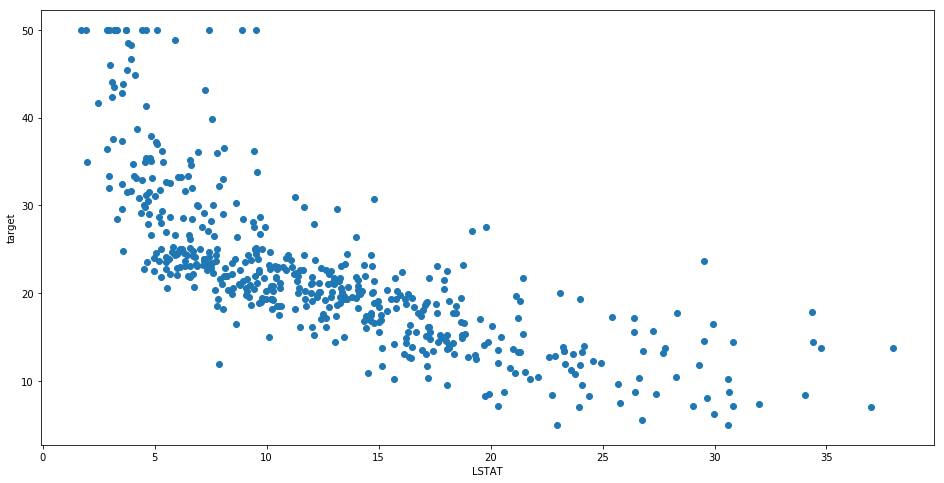

In [60]:
#lets plot the Scatter diagram of some of the features
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df1['LSTAT'], df1['target'])
ax.set_xlabel('LSTAT')
ax.set_ylabel('target')
plt.show()

# Boxplot

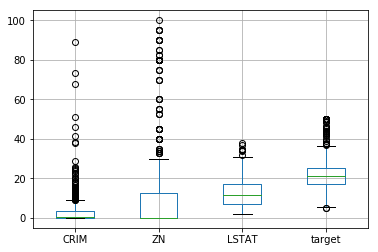

In [61]:
#Boxplot
boxplot = df1.boxplot(column=['CRIM', 'ZN', 'LSTAT' , 'target'])

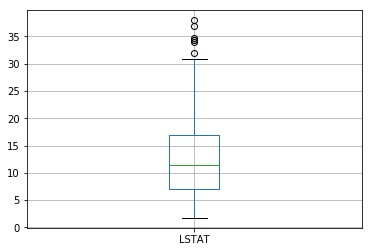

In [62]:
#Boxplot
boxplot = df1.boxplot(column=['LSTAT'])

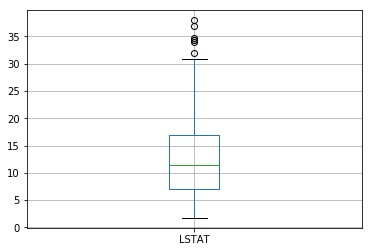

In [63]:
#creating a backup dataframe df2
df2 = df1
boxplot = df2.boxplot(column=['LSTAT'])

# outlier detection
### Z score is data mean centered divided by standard deviation 

In [64]:
#outlier detection
##Z score is data mean centered divided by standard deviation
##Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data
## points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.
#calculate Z score
df_temp = df1

from scipy import stats
z = np.abs(stats.zscore(df_temp))
#print data points whose z score is greater than 3
threshold = 3
#print(np.where(z > 3))

# print(z[[12]])
print("z score of 5th row 1st column = ", z[5][1]) #print z score of 5th row 1st column



z score of 5th row 1st column =  0.48772236467012914


# Outlier removal using Zscore

In [65]:
#Outlier removal using Zscore
#Z score is data mean centered divided by standard deviation 
## remove points +-3 taking that as outlier
df_temp_OutRemoved = df_temp[(z < 3).all(axis=1)]
print("Original data shape is: ", df1.shape)
print("Data shape after removing outliers: ", df_temp_OutRemoved.shape)

Original data shape is:  (506, 14)
Data shape after removing outliers:  (415, 14)


In [66]:
df_temp.head

<bound method NDFrame.head of          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  

In [67]:
#Head of the outlier removed data
df_temp_OutRemoved.head

<bound method NDFrame.head of          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  

In [68]:
## Removing outlier using IQR
Q1 = df_temp[ls].quantile(0.25)
Q3 = df_temp[ls].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
target       7.975000
dtype: float64


In [69]:
print(df_temp[ls] < (Q1 - 1.5 * IQR)) |(df_temp[ls] > (Q3 + 1.5 * IQR))

      CRIM     ZN  INDUS    NOX     RM    AGE    DIS    TAX  PTRATIO      B  \
0    False  False  False  False  False  False  False  False    False  False   
1    False  False  False  False  False  False  False  False    False  False   
2    False  False  False  False  False  False  False  False    False  False   
3    False  False  False  False  False  False  False  False    False  False   
4    False  False  False  False  False  False  False  False    False  False   
5    False  False  False  False  False  False  False  False    False  False   
6    False  False  False  False  False  False  False  False    False  False   
7    False  False  False  False  False  False  False  False    False  False   
8    False  False  False  False  False  False  False  False    False  False   
9    False  False  False  False  False  False  False  False    False  False   
10   False  False  False  False  False  False  False  False    False  False   
11   False  False  False  False  False  False  False

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [70]:
belowQ1Outlier=df_temp[ls].quantile(0.05)
aboveQ3Outlier=df_temp[ls].quantile(0.99)
print(belowQ1Outlier[:-1,],"\n")
print(aboveQ3Outlier[:-1,])

CRIM         0.027910
ZN           0.000000
INDUS        2.180000
NOX          0.409250
RM           5.314000
AGE         17.725000
DIS          1.461975
TAX        222.000000
PTRATIO     14.700000
B           84.590000
LSTAT        3.707500
Name: 0.05, dtype: float64 

CRIM        41.37033
ZN          90.00000
INDUS       25.65000
NOX          0.87100
RM           8.33500
AGE        100.00000
DIS          9.22277
TAX        666.00000
PTRATIO     21.20000
B          396.90000
LSTAT       33.91850
Name: 0.99, dtype: float64


In [72]:
boston_df_out = df_temp[~((df_temp[ls] < (Q1 - 1.5 * IQR)) |(df_temp[ls] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(boston_df_out.shape)
print(df_temp.shape)

(288, 14)
(506, 14)


# Now lets take a look at how the target is distributed

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: target, dtype: float64


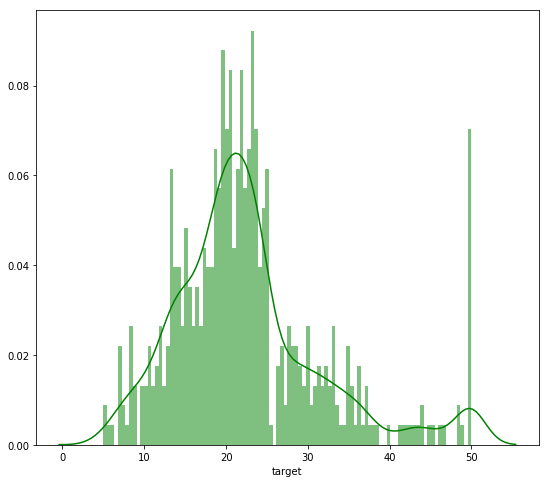

In [73]:
#Now lets take a look at how the target is distributed
print(df1['target'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df1['target'], color='g', bins=100, hist_kws={'alpha': 0.5});

In [22]:
df_temp_OutRemoved.shape

(415, 14)

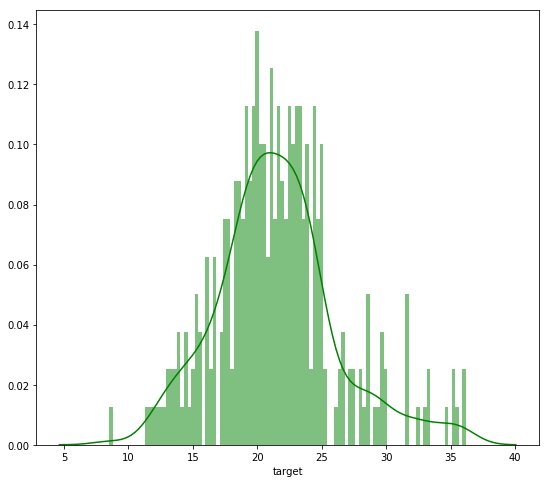

In [75]:
plt.figure(figsize=(9, 8))
sns.distplot(boston_df_out['target'], color='g', bins=100, hist_kws={'alpha': 0.5});

# plot the histogram of the features for EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CFE41827F0>,
      dtype=object)

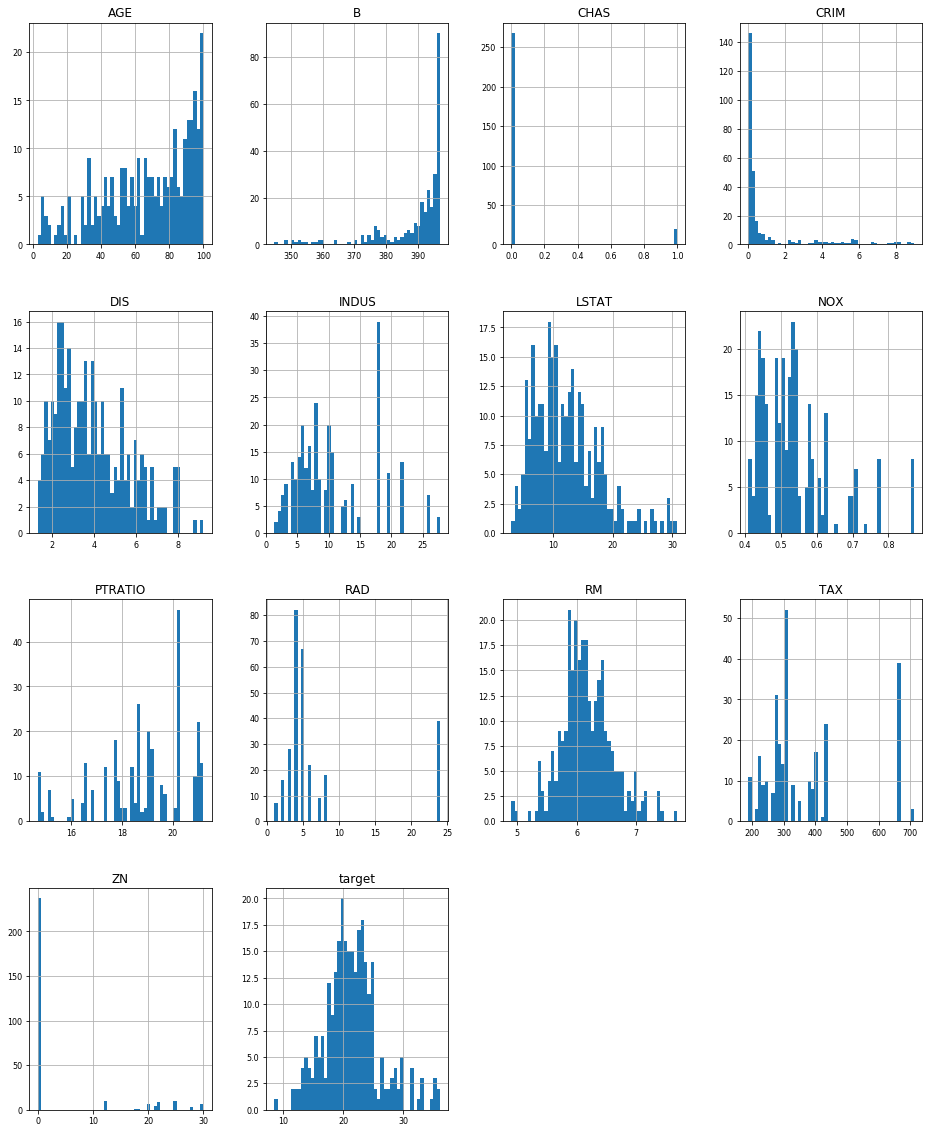

In [76]:
# plot the histogram of the features
boston_df_out.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


# Now lets find the correlation of the features with the target with a threshold 0.5. This can change on a case by case basis

In [121]:
#Now lets find the correlation of the features with the target with a threshold 0.5. This can change on a case by case basis
df1_corr = boston_df_out.corr()['target'][:-1]
corr = df1_corr[abs(df1_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with target:\n{}".format(len(corr), corr))

There is 2 strongly correlated values with target:
RM       0.660472
LSTAT   -0.670293
Name: target, dtype: float64



# lets see if we make absolute correlation > .3 what happens

In [78]:
#We see that absolute correlation threshold > 0.5 leaves out many features such as age, CHAS, etc.
#lets see if we make absolute correlation > 3 what happens
df1_corr = boston_df_out.corr()['target'][:-1]
corr = df1_corr[abs(df1_corr) > 0.3].sort_values(ascending=False)
print("There is {} strongly correlated values with target:\n{}".format(len(corr), corr))

#we see that keeping absolute correlation threshold > 0.3 retains many of the feaures
#we will use all the features for further analysis. However it depends on a case by case basis whether you want to drop any feature


There is 7 strongly correlated values with target:
RM       0.660472
CRIM    -0.328228
TAX     -0.359987
NOX     -0.427385
INDUS   -0.428978
AGE     -0.455836
LSTAT   -0.670293
Name: target, dtype: float64


# Now lets check correlation of features

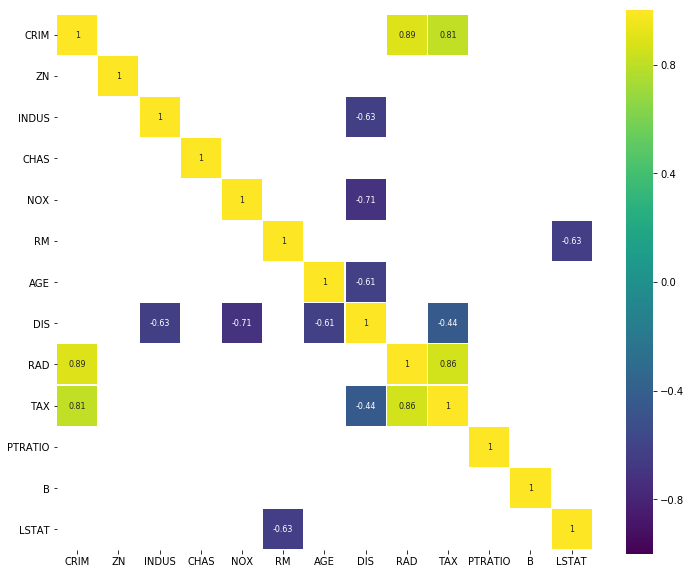

In [79]:
#now lets check correlation of features
corr_features = boston_df_out.drop('target', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_features[(corr_features >= 0.7) | (corr_features <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#We see that the features RAD and TAX are highly correlated. Now depending on the particular use case we can decide to either drop 
#one of these variables.
#We see that the features RAD and TAX are highly correlated with CRIM. Now depending on the particular use case we can decide to either drop 
#one of these variables.


# define feature matrix(X) and response vector(y) 

In [80]:
# define feature matrix(X) and response vector(y) 
# X = df1.loc[:, df1.columns != 'target'] 
# y = df1.loc[:, df1.columns == 'target'] 

X = boston_df_out.loc[:, boston_df_out.columns != 'target'] 
y = boston_df_out.loc[:, boston_df_out.columns == 'target'] 


# split X and y into training and testing sets

In [81]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [82]:
import statsmodels.api as sm
model = sm.OLS(y,X)
results = model.fit()
results.params

CRIM      -0.920816
ZN        -0.030479
INDUS     -0.010416
CHAS       0.956587
NOX        0.129838
RM         5.532212
AGE       -0.048656
DIS       -0.606780
RAD        0.392264
TAX       -0.013005
PTRATIO   -0.594711
B          0.022042
LSTAT     -0.117650
dtype: float64

In [83]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1643.
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          4.50e-252
Time:                        15:58:07   Log-Likelihood:                -670.25
No. Observations:                 288   AIC:                             1366.
Df Residuals:                     275   BIC:                             1414.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.9208      0.195     -4.724      0.000      -1.305      -0.537
ZN            -0.0305      0.022     -1.355      0.177      -0.075       0.014
INDUS         -0.0104      0.039     -0.267      0.789      -0.087       0.066
CHAS           0.9566      0.621      1.540      0.125      -0.266       2.180
NOX            0.1298      2.735      0.047      0.962      -5.254       5.513
RM             5.5322      0.420     13.174      0.000       4.706       6.359
AGE           -0.0487      0.009     -5.584      0.000      -0.066      -0.032
DIS           -0.6068      0.152     -3.993      0.000      -0.906      -0.308
RAD            0.3923      0.067      5.845      0.000       0.260       0.524
TAX           -0.0130      0.003     -5.073      0.000      -0.018      -0.008
PTRATIO       -0.5947      0.095     -6.245      0.000      -0.782      -0.407
B              0.0220      0.009      2.524      0.012       0.005       0.039
LSTAT         -0.1177      0.045     -2.635      0.009      -0.206      -0.030
==============================================================================
Omnibus:                       32.343   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.429
Skew:                           0.616   Prob(JB):                     4.58e-14
Kurtosis:                       4.897   Cond. No.                     9.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
boston_df_out.columns[[0,1,2,3,4,5,6,7,9,10,11,12]]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [122]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

##Step 1: Run a multiple regression
#gather features
features = "+".join(boston_df_out.columns[[0,1,2,3,4,5,6,7,9,10,11,12]])
# get y and X dataframes based on this regression:
ym, Xm = dmatrices('target ~' + features, boston_df_out, return_type='dataframe')

##Step 2: Calculate VIF Factors
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Xm.values, i) for i in range(Xm.shape[1])]
vif["features"] = Xm.columns

###Step 3: Inspect VIF Factors
vif.round(1)    

,VIF Factor,features
0,2157.0,Intercept
1,3.4,CRIM
2,1.6,ZN
3,2.6,INDUS
4,1.1,CHAS
5,3.9,NOX
6,2.0,RM
7,2.4,AGE
8,3.2,DIS
9,3.6,TAX


# create linear regression object 
## fit_intercept is used whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).
## normalize If True, the regressors X will be normalized before regression 

In [101]:
# create linear regression object 
#fit_intercept is used whether to calculate the intercept for this model. If set to False, no intercept will be used in 
#calculations (e.g. data is expected to be already centered).
# normalize If True, the regressors X will be normalized before regression 
reg_model = linear_model.LinearRegression(fit_intercept=True, normalize=True)

In [102]:
reg_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

# train the model using the training set 

In [103]:
# train the model using the training set 
reg_model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

# print the regression coefficients 

In [104]:
# print the regression coefficients 
feature_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
print('Coefficients: \n', reg_model.coef_) 

Coefficients: 
 [[-8.05015212e-01 -2.74693331e-02  1.60276631e-02  3.07459976e-01
  -3.13071001e+00  5.36081324e+00 -4.51546525e-02 -6.67574593e-01
   4.13999875e-01 -1.46604542e-02 -7.00303821e-01 -6.71966058e-05
  -1.31176749e-01]]


In [105]:
# print the regression intercept 
print('Intercept: \n', reg_model.intercept_)

Intercept: 
 [13.64492231]


# variance score 

In [106]:
# variance score where 1 means perfect prediction 
print('Variance score: {}'.format(reg_model.score(X_test, y_test)))

Variance score: 0.7348632858984447


In [107]:
print('Variance score: {}'.format(reg_model.score(X_train, y_train)))

Variance score: 0.7174160703673564


# Make predictions using the testing set

In [108]:
# Make predictions using the testing set
y_pred = reg_model.predict(X_test)

# print MSE

In [109]:
#print mean squared error. Ideal MSE is 0
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 5.52


# Print r squared error

In [110]:
# Print r squared error. Explained variance score (1 is perfect prediction)
print('r-squared error: %.2f' % r2_score(y_test, y_pred))

r-squared error: 0.73


# plotting the residual error 

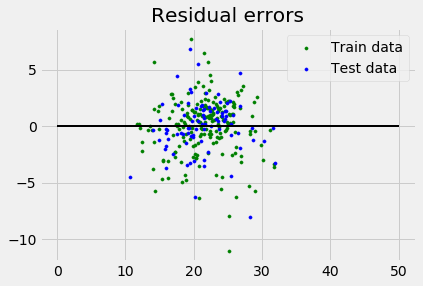

In [111]:
# plotting the residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg_model.predict(X_train), reg_model.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data') 

## plotting residual errors in test data 
plt.scatter(reg_model.predict(X_test), reg_model.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

# Lets change some modeling parameters and see how the accuracy changes

In [49]:
#Lets change some modeling parameters and see how the accuracy changes

# create linear regression object 
#fit_intercept is used whether to calculate the intercept for this model. If set to False, no intercept will be used in 
#calculations (e.g. data is expected to be already centered).
# normalize If True, the regressors X will be normalized before regression 
reg_model_2 = linear_model.LinearRegression(fit_intercept=False, normalize=False)

# train the model using the training set 
reg_model_2.fit(X_train, y_train) 

# Make predictions using the testing set
y_pred_2 = reg_model_2.predict(X_test)

#print mean squared error. Ideal MSE is 0
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred_2))

# Print r squared error. Explained variance score (1 is perfect prediction)
print('r-squared error: %.2f' % r2_score(y_test, y_pred_2))

Mean squared error: 20.40
r-squared error: 0.67


In [50]:
##Train R-Square 
reg_model_2.score(X_train, y_train) 

0.7456151244498906